In [166]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and Understanding Dataset

In [167]:
#importing csv
day=pd.read_csv("day.csv")

In [168]:
#finding shape of dataframe
print("shape =",day.shape)

shape = (730, 16)


In [169]:
#understanding values
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- all columns are numerical ones except dteday column

In [170]:
#checking for null values
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- we can see that there are no null values in dataframe

In [171]:
#let's describe numerical columns
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Handling

In [172]:
# instant column is only numeric column like sr. no. we can remove the column.
# dteday is date column and month,day,year, are already segregated.No use to analyse this column
day.drop(['instant','dteday'],axis=1,inplace=True)

In [173]:
casual_corr=day['casual'].corr(day['cnt'])
reg_corr=day['registered'].corr(day['cnt'])
print("co-relation between casual and cnt is =",casual_corr)
print("co-relation between registered and cnt is =",reg_corr)

co-relation between casual and cnt is = 0.672123409744397
co-relation between registered and cnt is = 0.9454106118483709


- co-realtion between registered and cnt is very high. we can drop registered column. Since our target variable is cnt we can drop registered column. 
- co-relation between casual and cnt is also pretty high and considerable. Since our target variable is cnt and casual +registered = cnt, we can drop casual

In [174]:
#dropping casual and registered columns
day.drop(['casual','registered'],axis=1,inplace=True)

#### we have all dataframe in numeric values, so it is considered as ordered categorical variable for certain columns where it is actually not the case. Also, analysis becomes easy reducing to see data dictionary effort everytime.


In [175]:
# so converting all the categorical column numerical values into labels
day['season']=day['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
day['yr']=day['yr'].map({1:"2019", 0:"2018"})
day['mnth']=day['mnth'].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
day['holiday']=day['holiday'].map({0:'no holiday',1:'holiday'})

#If we go by calendar looking for weekday jan1-2018 is Monday and jan2-2018 is Tuesday. 
#And every Monday & Tuesday of week is non working-day which seems little odd.
#So, not going by datedt column ,I assume 0 as Sunday and 6 as Saturday, let's create labels for weekday column
day['weekday']=day['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thurs',5:'Fri',6:'Sat'})

day['workingday']=day['workingday'].map({0:'non working',1:'working'})

#weathersit labels are too long, so representing some easily understandable values instead of actual ones.
day['weathersit']=day['weathersit'].map({1:'Clear',2:'Cloudy',3:'Light Snow',4:'Heavy Snow'})

In [176]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,no holiday,Sat,non working,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,no holiday,Sun,non working,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,no holiday,Mon,working,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,no holiday,Tue,working,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,no holiday,Wed,working,Clear,9.305237,11.46350,43.6957,12.522300,1600


- we can see that ordered numeric variables got converted into text labels.

## Exploratory Data Analysis

### Univariate Analysis

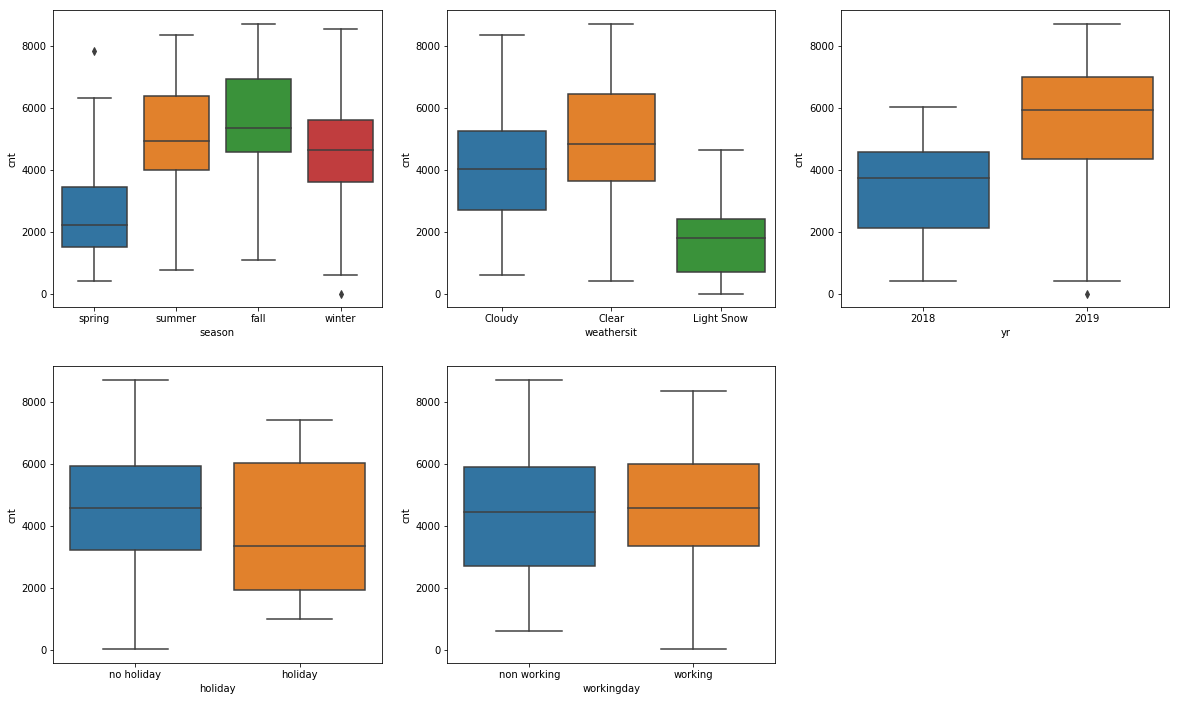

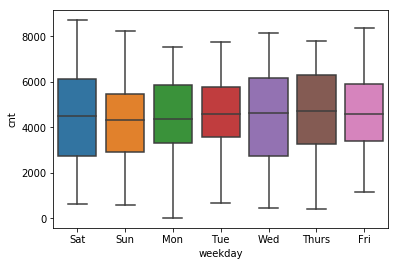

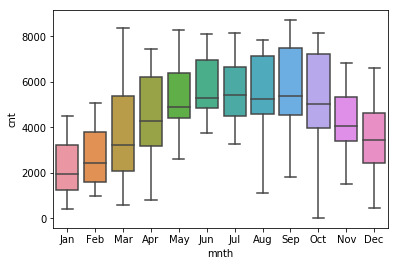

In [177]:
#Let's plot box-plots for categorical variables all at once 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.show()
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.show()

- in season column we can see that people ride more bikes in fall season and least in spring season
- in weathersit column we can see that people ride more bikes when the weather is Clear/Few clouds/Partly cloudy and they donot ride bike when weather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- in 2019 year many people rode bike as compared to 2018
- when there is holiday people tend to relax and not ride bike compared to non holiday days.
- mean for working and non working day is same and 3rd quartile also seems to be same. However by comparing 1st quartile we can say that there are few people who like to ride bike on non-working days.
- mean for all working days seem almost same.
- people tend to ride less during Jan,Feb,Nov and Dec month.
- people tend to ride most during Aug,Sep,Oct months

### Bivariate Analysis

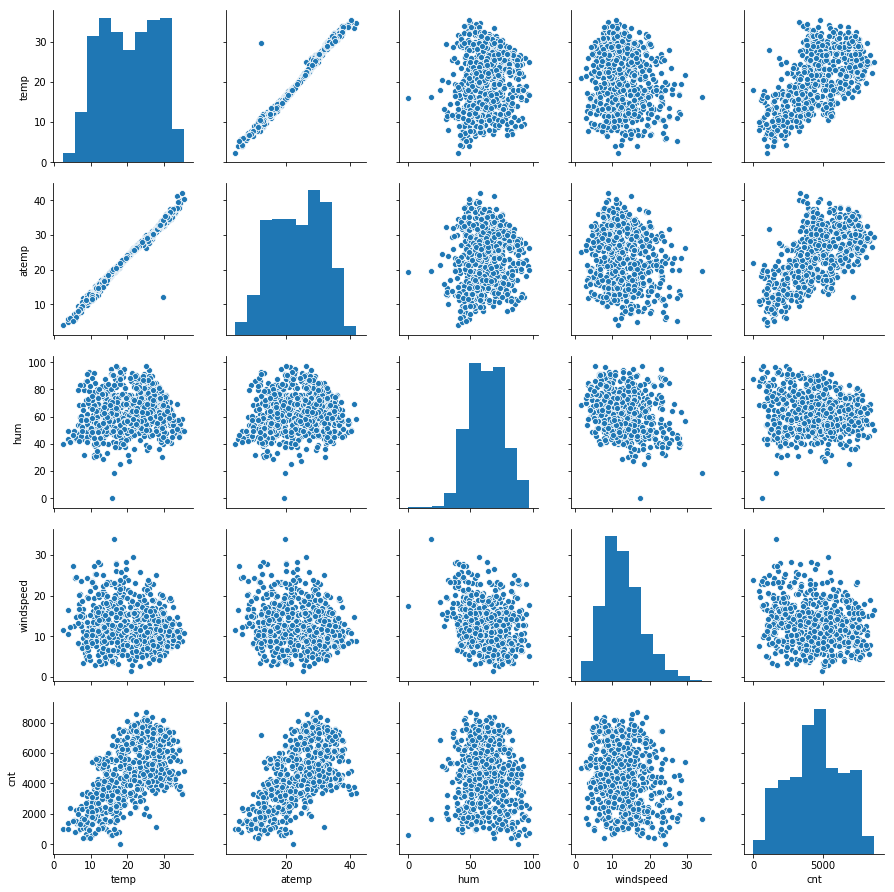

In [178]:
#let's look at pairplot of numeric variables
sns.pairplot(day[['temp','atemp','hum','windspeed','cnt']])
plt.show()

- atemp & temp seems to be having almost equal values and it is also showing very increase in trend. Let's verify using co-relation in the heatmap later. We can drop one column. 
- when looked at cnt colum vs others in pair plot we can see that :   
    - we can see a positive increasing trend between atemp and cnt. people tend to ride more bikes at high feeling  temperatures between 30-40
    - people will ride bikes irrespective of humidity.
    - people will ride bike irrespective of any windspeed  
    - from cnt histogram we can see there is normal distribution

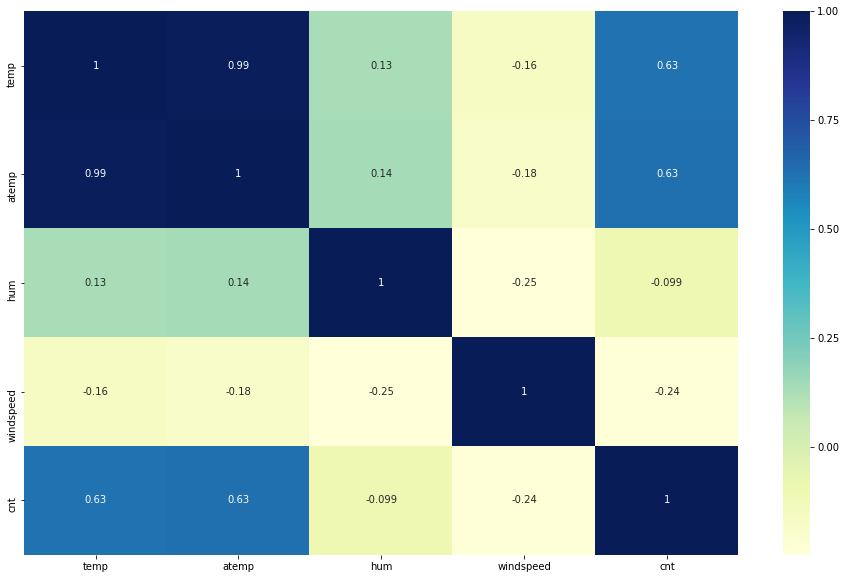

In [179]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

- we can see that temp adn atemp have almost same values because their co-relation is almost equal to 1. we can drop any one column.


In [180]:
#dropping temp variable because we are mainly concerned with feeling temperature instead of temp.
day.drop(['temp'],axis=1,inplace=True)

## Dummy Variable categorization

- Data was converted into labels for analysis purpose but we require numerical columns for building models.
- Binary category variables doesn't require to be converted to dummy variables. So, re converting labels into 0's and 1's for binary category variables.

In [181]:
#let's reconvert binary category labels into integers
day['yr']=day['yr'].map({"2019":1,"2018":0})
day['holiday']=day['holiday'].map({'no holiday':0,'holiday':1})
day['workingday']=day['workingday'].map({'non working':0,'working':1})

In [182]:
# Get the dummy variables and drop the fist variable as we can find that variable comparing remaining dummies.
#Also presence of the 4 variables will give VIF as infinity, so it is necessary to drop one variable.
season_status = pd.get_dummies(day['season'], drop_first = True)
weathersit_status=pd.get_dummies(day['weathersit'], drop_first = True)
weekday_status=pd.get_dummies(day['weekday'], drop_first = True)
mnth_status=pd.get_dummies(day['mnth'], drop_first = True)


In [183]:
day_dummy_df=pd.concat([day,season_status,weathersit_status,weekday_status,mnth_status],axis=1)

In [184]:
#Let's have a look at the new dataframe.
day_dummy_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,Cloudy,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,Cloudy,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


- we can see that earlier dummy column exists and are required to be dropped.

In [185]:
# Dropping the dummy created base variables
day_dummy_df.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)

In [186]:
#let's check again 
print("before dummies dataframe shape =",day.shape)
print("after dummies dataframe shape =",day_dummy_df.shape)

before dummies dataframe shape = (730, 11)
after dummies dataframe shape = (730, 29)


- we can see that 18 new variables got introduced with dummies and now we are left with 29 columns.

## Splitting the Data into Training and Testing Sets

In [187]:
from sklearn.model_selection import train_test_split
import numpy as np

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day_dummy_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [188]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


## Rescaling Features

In [189]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Applying scaler() to all the columns except the '1-0'
num_vars = ['atemp','hum','windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [190]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- we can see that all the values have been converted between 0 to 1 

## Dividing into X and Y sets for the model building

In [192]:
y_train = df_train.pop('cnt')
X_train = df_train

## RFE

Recursive feature elimination
- There are 29 variables remaining, if we manually build model and remove variables one by one it will take lot of time. So, we will use RFE method to first determine important 15 variables for model building so that we might not loose significant ones.

In [193]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [194]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [195]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Cloudy', True, 1),
 ('Light Snow', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thurs', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 13),
 ('Aug', True, 1),
 ('Dec', False, 3),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 14),
 ('Jun', False, 7),
 ('Mar', False, 12),
 ('May', False, 6),
 ('Nov', False, 4),
 ('Oct', False, 10),
 ('Sep', True, 1)]

In [196]:
#filtering top_15 columns.
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'Cloudy', 'Light Snow', 'Sat', 'Sun', 'Aug', 'Jan', 'Sep'],
      dtype='object')

In [197]:
#Removed columns are:
X_train.columns[~rfe.support_]

Index(['spring', 'Mon', 'Thurs', 'Tue', 'Wed', 'Dec', 'Feb', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

## Building a linear model

- Let's fit all the variables and check model accuracy first. We will get to know significance of variables as well.
- Then using p-values and VIF we can later filter out insignificant columns and check accuracy one by one. 

In [198]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [199]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [200]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sun, 30 May 2021   Prob (F-statistic):          9.10e-189
Time:                        01:49:00   Log-Likelihood:                 510.94
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     495   BIC:                            -928.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1731      0.023      7.501      0.0

- we can see that R-Squared and Adj. R-squared are pretty good for model accuracy. 
- P values for 2 variables lies above 0.05. There are 2 insignificant variables.
- co-efficient values are also not much higher.

## Checking VIF

In [201]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [202]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,34.12
10,Sat,8.41
11,Sun,8.22
1,holiday,2.24
3,atemp,1.91
4,hum,1.89
8,Cloudy,1.57
7,winter,1.56
13,Jan,1.55
6,summer,1.48


- workingday has vary high VIF. But variable is significant. whereas p-value for holiday is 0.320 which is also highly insignificant.
- Let's drop holiday column and then check our model accuracy again with changed VIF values

## Dropping the variable and updating the model

In [203]:
# Dropping highly correlated variables and insignificant variables
X = X_train_rfe.drop('holiday', 1,)

In [204]:
# Build a third fitted model
X_train_lm2 = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()

In [205]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sun, 30 May 2021   Prob (F-statistic):          9.10e-189
Time:                        01:50:05   Log-Likelihood:                 510.94
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     495   BIC:                            -928.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1521      0.037      4.066      0.0

- modal accuracy remains same.
- all the variables are significant
- model looks good

In [206]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.26
1,workingday,16.08
2,atemp,12.34
4,windspeed,4.36
9,Sat,4.36
10,Sun,4.27
7,Cloudy,2.22
0,yr,2.07
6,winter,2.04
5,summer,1.96


- we can see that workingday value decreased from 85 to 16.08 with dropping of holiday column.
- since all p-values are significant and hum feature has high VIF.
- Let's drop hum column and check if VIF of other's is decreased and check model accuracy as well.

In [207]:
# Dropping highly correlated variables and insignificant variables

X2 = X.drop('hum', 1,)

In [208]:
# Build a third fitted model
X_train_lm3 = sm.add_constant(X2)

lr_3 = sm.OLS(y_train, X_train_lm3).fit()

In [164]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sun, 30 May 2021   Prob (F-statistic):          5.32e-186
Time:                        01:46:20   Log-Likelihood:                 501.59
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     496   BIC:                            -915.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0625      0.032      1.977      0.0

- R-squared and Adj. R-squared decreased by negligible points. Also thre is no much change in coef and pvalues.
- Only sunday variable has become insignificant

In [210]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,11.08
2,atemp,9.86
3,windspeed,4.36
8,Sat,3.30
9,Sun,3.09
0,yr,2.06
4,summer,1.94
5,winter,1.80
6,Cloudy,1.59
10,Aug,1.56


- working day has high VIF value.
- Let's delete workingday column and check the model accuracy,p-values,coef again

In [211]:
# Dropping highly correlated variables and insignificant variables

X3 = X2.drop('workingday', 1,)

In [213]:
# Build a third fitted model
X_train_lm4= sm.add_constant(X3)

lr_4 = sm.OLS(y_train, X_train_lm4).fit()

In [214]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.0
Date:                Sun, 30 May 2021   Prob (F-statistic):          4.05e-184
Time:                        01:55:13   Log-Likelihood:                 494.34
No. Observations:                 510   AIC:                            -962.7
Df Residuals:                     497   BIC:                            -907.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1555      0.020      7.720      0.0

- R-squared and Adj. R-squared decreased by negligible points. Also thre is no much change in coef and pvalues.
- Only Sat variable has become insignificant

In [215]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.07
2,windspeed,3.33
0,yr,2.04
3,summer,1.90
4,winter,1.58
9,Aug,1.56
5,Cloudy,1.54
11,Sep,1.31
10,Jan,1.23
7,Sat,1.21


- now max VIF near t0 5.
- let's drop Sat column and check for model accuracy,significance, VIF again

In [217]:
# Dropping highly correlated variables and insignificant variables
X4 = X3.drop('Sat', 1,)

In [218]:
# Build a third fitted model
X_train_lm5= sm.add_constant(X4)

lr_5 = sm.OLS(y_train, X_train_lm5).fit()

In [219]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sun, 30 May 2021   Prob (F-statistic):          5.66e-185
Time:                        02:01:01   Log-Likelihood:                 493.56
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1580      0.020      7.884      0.0

In [220]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.03
2,windspeed,3.27
0,yr,2.04
3,summer,1.90
4,winter,1.57
8,Aug,1.56
5,Cloudy,1.54
10,Sep,1.31
9,Jan,1.22
7,Sun,1.17


- Now there is no insignificant p-value and VIF values are also near to 5 or below 5.
- R-squared value is also 0.832 and Adj. R-squared is also 0.828.
- We can say that we can get best prediction with the above 11 variables.

### model 5 is the best one with R-Squared-0.832, Adj. R-Squared - 0.828 with 11 significant variables and VIF less than 5.


## Residual Analysis of the train data

In [223]:
y_train_cnt = lr_5.predict(X_train_lm5)

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

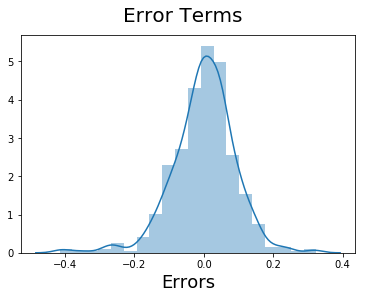

In [224]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- we can see that error terms are normally distributed and mean lies about 0

## Making Predictions Using the Final Model

- Applying the scaling on the test sets

In [232]:
num_vars = ['atemp','windspeed','hum','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [233]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,1.897202,0.129842,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.217888,0.463866,0.051368,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.025950,0.724590,0.015460,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,1.550821,0.092963,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,1.863665,0.125381,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,2.225453,0.158650,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,3.029478,0.288534,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X_test and y_test

In [250]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test=X_test[list(X4.columns)]

In [251]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [252]:
# Making predictions using the fifth model
y_pred_m5 = lr_5.predict(X_test_m5)

## Model Evaluation

Text(0, 0.5, 'y_pred')

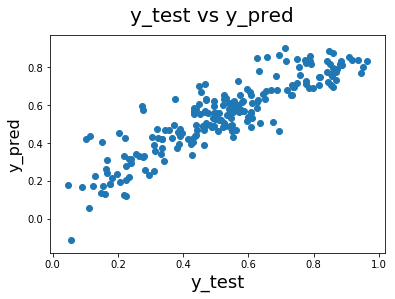

In [253]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [254]:
#calculating r2 for test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m5)

0.7855089315411234

- training r-squared is 0.804 and test r-squared is 0.78.
- We can say that model is not overfitted.

In [278]:
#ordering co-efficients
lr_5.params.sort_values(ascending=False)

atemp         0.511315
yr            0.234569
const         0.158038
winter        0.120420
Sep           0.112029
summer        0.090609
Aug           0.063595
Sun          -0.045668
Jan          -0.047773
Cloudy       -0.082541
windspeed    -0.142948
Light Snow   -0.279626
dtype: float64

we can write an equation for prediction like
- y_pred=const X 0.158038 + yr X 0.234569 + atemp X 0.511315 - windspeed X 0.142948 + summer X 0.090609 + winter X 0.120420 - Cloudy X 0.082541 - Light Snow X 0.279626 - sun X 0.045668 + Aug X 0.063595 - Jan X 0.047773 + Sep X 0.112029

### If top 5 influencing variables are to be considered then based on co-efficient values we can select atemp, yr, const, winter, Sep variables. 

## Assumptions of Linear Regression.
- 1) From VIF values we have seen that there is no co-linearity between 11 variables.
- 2) From Residual Analysis we have figured out that Error terms are normally distributed.
- 3) From Residual analysis we have figured out that Error terms have mean 0.
- 4) From the y_test vs y_pred graph we can see that there is homosedacity around the prediction line